In [3]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from registration_utilities import parallel_where_binary, Aligner4
from data_manager import *
from metadata import *

Setting environment for Gordon


No vtk


In [4]:
stack_fixed = 'MD589'
stack_moving = 'MD594'

In [6]:
volume_fixed = bp.unpack_ndarray_file(os.path.join(VOLUME_ROOTDIR, '%(stack)s/%(stack)s_down32_annotationVolume.bp' % {'stack': stack_fixed}))
volume_moving = bp.unpack_ndarray_file(os.patzh.join(VOLUME_ROOTDIR, '%(stack)s/%(stack)s_down32_annotationVolume.bp' % {'stack': stack_moving}))
print volume_fixed.shape
print volume_moving.shape

(348, 421, 377)
(326, 515, 368)


In [4]:
label_to_name_fixed = {}
name_to_label_fixed = {}

with open(os.path.join(VOLUME_ROOTDIR, stack_fixed, stack_fixed+'_down32_annotationVolume_nameToLabel.txt'), 'r') as f:
    for line in f.readlines():
        name_s, label = line.split()
        label_to_name_fixed[int(label)] = name_s
        name_to_label_fixed[name_s] = int(label)
        
with open(os.path.join(VOLUME_ROOTDIR, stack_fixed, stack_fixed+'_down32_annotationVolume_bbox.txt'), 'r') as f:
    vol_fixed_xmin, vol_fixed_xmax, vol_fixed_ymin, vol_fixed_ymax, vol_fixed_zmin, vol_fixed_zmax = map(int, f.readline().strip().split())

In [5]:
label_to_name_moving = {}
name_to_label_moving = {}

with open(os.path.join(VOLUME_ROOTDIR, stack_moving, stack_moving+'_down32_annotationVolume_nameToLabel.txt'), 'r') as f:
    for line in f.readlines():
        name_s, label = line.split()
        label_to_name_moving[int(label)] = name_s
        name_to_label_moving[name_s] = int(label)
        
with open(os.path.join(VOLUME_ROOTDIR, stack_moving, stack_moving+'_down32_annotationVolume_bbox.txt'), 'r') as f:
    vol_moving_xmin, vol_moving_xmax, vol_moving_ymin, vol_moving_ymax, vol_moving_zmin, vol_moving_zmax = map(int, f.readline().strip().split())

In [6]:
labelIndexMap_m2f = {}
for label_m, name_m in label_to_name_moving.iteritems():
    labelIndexMap_m2f[label_m] = name_to_label_fixed[name_m]

In [7]:
label_weights_m = {}
for label_m, name_m in label_to_name_moving.iteritems():
    if 'surround' in name_m:
        label_weights_m[label_m] = 0
    else:
        label_weights_m[label_m] = 1
#         label_weights_m[label_m] = np.minimum(1e5 / volume_moving_structure_sizes[label_m], 1.)

In [8]:
# aligner = Alizgner4(volume_fixed, volume_moving, labelIndexMap_m2f={37:37, 36:36})

In [9]:
aligner = Aligner4(volume_fixed, volume_moving, labelIndexMap_m2f=labelIndexMap_m2f)

In [10]:
aligner.set_centroid(centroid_m='volume_centroid', centroid_f='volume_centroid')
# aligner.set_centroid(centroid_m='structure_centroid', centroid_f='centroid_m', indices_m=[name_to_label_moving['SNR_R']])

In [11]:
gradient_filepath_map_f = {ind_f: VOLUME_ROOTDIR + '/%(stack)s/gradients/%(stack)s_down32_annotationVolume_%(label)s_%%(suffix)s.bp' % \
                           {'stack': stack_fixed, 'label': label_to_name_fixed[ind_f]}
                           for ind_m, ind_f in labelIndexMap_m2f.iteritems()}

In [12]:
aligner.load_gradient(gradient_filepath_map_f=gradient_filepath_map_f, indices_f=None)

set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])


load gradient 1: 0.251417 seconds
load gradient 2: 0.250654 seconds
load gradient 3: 0.253008 seconds
load gradient 4: 0.252701 seconds
load gradient 5: 0.247372 seconds
load gradient 6: 0.250261 seconds
load gradient 7: 0.249592 seconds
load gradient 8: 0.251413 seconds
load gradient 9: 0.254106 seconds
load gradient 10: 0.248095 seconds
load gradient 11: 0.254398 seconds
load gradient 12: 0.250149 seconds
load gradient 13: 0.248966 seconds
load gradient 14: 0.248797 seconds
load gradient 15: 0.250036 seconds
load gradient 16: 0.249799 seconds
load gradient 17: 0.248256 seconds
load gradient 18: 0.249343 seconds
load gradient 19: 0.255022 seconds
load gradient 20: 0.250192 seconds
load gradient 21: 0.263737 seconds
load gradient 22: 0.249932 seconds
load gradient 23: 0.248657 seconds
load gradient 24: 0.249481 seconds
load gradient 25: 0.249359 seconds
load gradient 26: 0.247711 seconds
load gradient 27: 0.249325 seconds
load gradient 28: 0.251810 seconds
load gradient 29: 0.252217 se

In [ ]:
# aligner.load_gradient(gradient_filepath_map_f=gradient_filepath_map_f, indices_f=[name_to_label_fixed['5N_L'],
#                                                                                  name_to_label_fixed['5N_R'],
#                                                                                  name_to_label_fixed['12N'],
#                                                                                   name_to_label_fixed['SNR_L'],
#                                        name_to_label_fixed['SNR_R']])

In [ ]:
# aligner.load_gradient(gradient_filepath_map_f=gradient_filepath_map_f, indices_f=[name_to_label_fixed['SNR_L']])

In [ ]:
# T, scores = aligner.optimize(type='rigid', max_iter_num=10, history_len=500, terminate_thresh=1e-4,
#                              grid_search_sample_number=1000,
#                              indices_m=None)

In [ ]:
# T, scores = aligner.optimize(type='rigid', max_iter_num=20, history_len=500, terminate_thresh=1e-4,
#                              indices_m=[name_to_label_moving['5N_L'],
#                                         name_to_label_moving['5N_R'],
#                                        name_to_label_fixed['12N'],
#                                        name_to_label_fixed['SNR_L'],
#                                        name_to_label_fixed['SNR_R']])

In [15]:
# largely the same optimization path regardless of the starting condition

# For rigid, 
# grad_computation_sample_number = 1e5 is desired
# grid_search_iteration_number and grid_search_sample_number seem to be unimportant as well, set to 100
# lr1=10, lr2=.1 is best

# For affine, 
# lr2 = .001 is too slow; 0.1 rises faster than 0.01
# lr1 does not matter
# plateus around iteration 100, but keep rising afterwards.
# grad_computation_sample_number does not make a difference

T, scores = aligner.optimize(type='rigid', max_iter_num=1000, history_len=50, terminate_thresh=1e-4,
#                              indices_m=[name_to_label_fixed['SNR_L']],
                             indices_m=None,
                            grid_search_iteration_number=10,
                             grid_search_sample_number=1000,
                             grad_computation_sample_number=1e5,
                             label_weights=label_weights_m,
                             lr1=10., lr2=.1,
                            std_tx=50, std_ty=50, std_tz=100, std_theta_xy=np.deg2rad(10))
#                              init_T=[1,0,0,-10,0,1,0,0,0,0,1,0])

Regularization weights not set, default to 0.
grid search: 33.086505 seconds
-inf 1.365938
grid search: 26.226196 seconds
1.365938 2.065695
grid search: 20.042289 seconds
2.065695 2.395462
grid search: 13.905307 seconds
2.395462 2.400787
grid search: 11.018460 seconds
2.400787 2.410960
grid search: 7.390398 seconds
2.410960 2.449153
grid search: 5.815045 seconds
2.449153 2.456233
grid search: 3.974876 seconds
grid search: 3.704771 seconds
grid search: 2.368973 seconds
iteration 0


params_best_upToNow [ 45.26620214  13.23910826   2.28110813   0.3525588 ]


step: 1.52 seconds
score: 2.456233
iteration 1
step: 1.54 seconds
score: 1.539929
iteration 2
step: 1.52 seconds
score: 2.043931
iteration 3
step: 1.57 seconds
score: 1.657087
iteration 4
step: 1.54 seconds
score: 2.004569
iteration 5
step: 1.55 seconds
score: 2.097714
iteration 6
step: 1.52 seconds
score: 2.328980
iteration 7
step: 1.53 seconds
score: 2.414325
iteration 8
step: 1.53 seconds
score: 2.382917
iteration 9
step: 1.54 seconds
score: 2.269104
iteration 10
step: 1.52 seconds
score: 2.345250
iteration 11
step: 1.54 seconds
score: 2.318082
iteration 12
step: 1.53 seconds
score: 2.353165
iteration 13
step: 1.54 seconds
score: 2.324568
iteration 14
step: 1.53 seconds
score: 2.312523
iteration 15
step: 1.54 seconds
score: 2.301406
iteration 16
step: 1.53 seconds
score: 2.283480
iteration 17
step: 1.54 seconds
score: 2.277529
iteration 18
step: 1.53 seconds
score: 2.258056
iteration 19
step: 1.54 seconds
score: 2.249564
iteration 20
step: 1.53 seconds
score: 2.226191
iteration 21
s

[[  0.89305093  -0.43991738   0.09451316  24.78599838]
 [  0.43055592   0.89649531   0.10448809  22.78435928]
 [ -0.13069673  -0.05261998   0.990025   -13.32126801]]
2.45623257061 2.23373443968


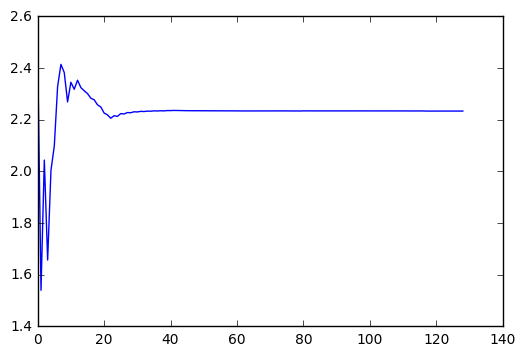

In [16]:
print T.reshape((3,4))
plt.plot(scores);
print max(scores), scores[-1]

In [17]:
T, scores = aligner.optimize(type='affine', max_iter_num=1000, history_len=50, terminate_thresh=1e-4,
                             indices_m=None,
                            grid_search_iteration_number=10,
                             grid_search_sample_number=1000,
                             grad_computation_sample_number=1e5,
                             label_weights=label_weights_m,
                             lr1=10., lr2=.1,
                            std_tx=50, std_ty=50, std_tz=100, std_theta_xy=np.deg2rad(10))

Regularization weights not set, default to 0.
grid search: 33.087320 seconds
-inf 1.314364
grid search: 25.568659 seconds
1.314364 2.196167
grid search: 19.612031 seconds
2.196167 2.336243
grid search: 14.236928 seconds
2.336243 2.356252
grid search: 10.393016 seconds
2.356252 2.415860
grid search: 7.417863 seconds
2.415860 2.436287
grid search: 5.581640 seconds
2.436287 2.451813
grid search: 4.208285 seconds
2.451813 2.452472
grid search: 3.172884 seconds
grid search: 2.489305 seconds
2.452472 2.456661
iteration 0


params_best_upToNow [ 46.27751555  13.52796646   1.8419955    0.36869407]


step: 1.93 seconds
score: 2.456661
iteration 1
step: 1.92 seconds
score: 0.794782
iteration 2
step: 1.85 seconds
score: 1.769891
iteration 3
step: 1.86 seconds
score: 2.016898
iteration 4
step: 1.91 seconds
score: 1.996084
iteration 5
step: 1.96 seconds
score: 2.261541
iteration 6
step: 1.93 seconds
score: 2.274143
iteration 7
step: 1.96 seconds
score: 2.360315
iteration 8
step: 1.94 seconds
score: 2.477612
iteration 9
step: 1.96 seconds
score: 2.481129
iteration 10
step: 1.95 seconds
score: 2.576038
iteration 11
step: 1.96 seconds
score: 2.547340
iteration 12
step: 1.95 seconds
score: 2.617909
iteration 13
step: 1.96 seconds
score: 2.615536
iteration 14
step: 1.96 seconds
score: 2.677671
iteration 15
step: 1.96 seconds
score: 2.661818
iteration 16
step: 1.88 seconds
score: 2.707335
iteration 17
step: 1.96 seconds
score: 2.685934
iteration 18
step: 1.96 seconds
score: 2.723945
iteration 19
step: 1.96 seconds
score: 2.703434
iteration 20
step: 1.96 seconds
score: 2.734312
iteration 21
s

[[  0.86779817  -0.37150675   0.05786971  30.80189844]
 [  0.27547663   0.94844116  -0.03630952  16.30039677]
 [ -0.05244006   0.09269176   0.99736409  -8.57212842]]
2.77999884912 2.77936630285


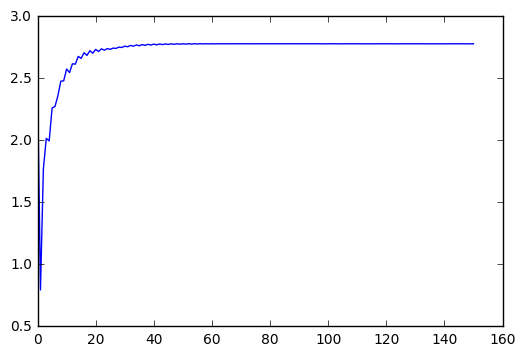

In [18]:
print T.reshape((3,4))
plt.plot(scores);
print max(scores), scores[-1]

In [21]:
global_transform_scheme = 1

In [26]:
params_fp = DataManager.get_global_alignment_parameters_filepath(stack_moving=stack_moving,
                                                     moving_volume_type='annotation',
                                                    stack_fixed=stack_fixed,
                                                     fixed_volume_type='annotation',
                                                    global_transform_scheme=global_transform_scheme)

DataManager.save_alignment_parameters(params_fp, T, 
                                      aligner.centroid_m, aligner.centroid_f,
                                      aligner.xdim_m, aligner.ydim_m, aligner.zdim_m, 
                                      aligner.xdim_f, aligner.ydim_f, aligner.zdim_f)

In [31]:
score_plot_fp = DataManager.get_global_alignment_score_plot_filepath(stack_moving=stack_moving,
                                                                     moving_volume_type='annotation',
                                                                    stack_fixed=stack_fixed,
                                                                 fixed_volume_type='annotation',
                                                                    global_transform_scheme=global_transform_scheme)

fig = plt.figure();
plt.plot(scores);
plt.savefig(score_plot_fp, bbox_inches='tight')
plt.close(fig)

In [ ]:
# READ

In [33]:
stack_fixed = 'MD589'
stack_moving = 'MD594'

In [34]:
volume_fixed = bp.unpack_ndarray_file(DataManager.get_annotation_volume_filepath(stack=stack_fixed, downscale=32))
volume_moving = bp.unpack_ndarray_file(DataManager.get_annotation_volume_filepath(stack=stack_moving, downscale=32))
print volume_fixed.shape
print volume_moving.shape

'/oasis/projects/nsf/csd395/yuncong/CSHL_volumes2//MD594/MD594_down32_annotationVolume.bp'

In [42]:
global_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f = \
DataManager.load_global_alignment_parameters(stack_fixed=stack_fixed, stack_moving=stack_moving, 
                                             fixed_volume_type='annotation', moving_volume_type='annotation',
                                             global_transform_scheme=1)

In [49]:
from registration_utilities import transform_points, transform_volume

In [58]:
volume_m_aligned_to_f = transform_volume(vol=volume_moving, 
                                           global_params=global_params, 
                                           centroid_m=centroid_m, 
                                           centroid_f=centroid_f,
                                          xdim_f=xdim_f,
                                          ydim_f=ydim_f,
                                          zdim_f=zdim_f)

output_fn = DataManager.get_transformed_volume_filepath(stack_m=stack_moving, type_m='annotation',
                                            stack_f=stack_fixed, type_f='annotation',
                                            downscale=32, global_transform_scheme=global_transform_scheme)
print output_fn

create_if_not_exists(os.path.dirname(output_fn))
bp.pack_ndarray_file(volume_m_aligned_to_f, output_fn)

In [61]:
xmin_vol_f, xmax_vol_f, ymin_vol_f, ymax_vol_f, zmin_vol_f, zmax_vol_f = \
DataManager.load_volume_bbox(stack=stack_fixed, type='annotation', downscale=32)

In [62]:
from registration_utilities import find_contour_points

In [63]:
downsample_factor = 32
xy_pixel_distance_downsampled = xy_pixel_distance_lossless * downsample_factor
voxel_z_size = section_thickness / xy_pixel_distance_downsampled

In [66]:
viz_dir = create_if_not_exists(DataManager.get_global_alignment_viz_dir(stack_moving=stack_moving,
                                             moving_volume_type='annotation',
                                             stack_fixed=stack_fixed,
                                            fixed_volume_type='annotation',
                                            global_transform_scheme=global_transform_scheme))

In [67]:
first_sec, last_sec = metadata_cache['section_limits'][stack_fixed]

In [68]:
stack_colors = {'MD589': (255,0,0), 'MD594': (0,255,0)}

In [70]:
bar = show_progress_bar(first_sec, last_sec)

for sec in range(first_sec, last_sec+1):
    
    if metadata_cache['sections_to_filenames'][stack_fixed][sec] in ['Placeholder', 'Rescan', 'Nonexisting']:
        continue
    
    bar.value = sec
    
    img_fn = DataManager.get_image_filepath(stack=stack_fixed, section=sec, resol='thumbnail', version='aligned_tif')
    img = imread(img_fn)
    
#     img = imread('/home/yuncong/CSHL_data_processed/%(stack_fixed)s/%(stack_fixed)s_thumbnail_sorted_aligned/%(stack_fixed)s_%(sec)04d_thumbnail_aligned.tif' %\
#                dict(stack_fixed=stack_fixed, sec=sec))

    viz = img.copy()

    z = voxel_z_size * (sec - 1) - zmin_vol_f

    contours_f_on_volume = find_contour_points(volume_fixed[..., int(z)])
    contours_f_on_cropped = {i: [cnt + (xmin_vol_f, ymin_vol_f) for cnt in cnts] for i, cnts in contours_f_on_volume.iteritems()}

    contours_m_alignedTo_f_on_volume = find_contour_points(volume_m_aligned_to_f[..., int(z)])
    contours_m_alignedTo_f_on_cropped = {i: [cnt + (xmin_vol_f, ymin_vol_f) for cnt in cnts] for i, cnts in contours_m_alignedTo_f_on_volume.iteritems()}

    for ind_m, cnts_m in contours_m_alignedTo_f_on_cropped.iteritems():
        for cnt_m in cnts_m:
            cv2.polylines(viz, [cnt_m.astype(np.int)], True, stack_colors[stack_moving], 2)

    for ind_f, cnts_f in contours_f_on_cropped.iteritems():
        for cnt_f in cnts_f:
            cv2.polylines(viz, [cnt_f.astype(np.int)], True, stack_colors[stack_fixed], 2)

#     plt.figure(figsize=(20,20));
#     plt.imshow(viz[:800, :1200])
#     plt.show();
    
    viz_fn = os.path.join(viz_dir, '%(stack_moving)s_to_%(stack_fixed)s_%(sec)04d.jpg' % \
          {'stack_moving': stack_moving, 'stack_fixed': stack_fixed, 'sec': sec})
    imsave(viz_fn, viz[:800, :1200])

In [24]:
volume_m_alignedTo_f_fn = os.path.join(atlasAlignParams_dir, '%(stack_moving)s_down32_annotationVolume_alignedTo_%(stack_fixed)s_down32_annotationVolume.bp' % \
                                       {'stack_moving': stack_moving, 'stack_fixed': stack_fixed})

In [21]:
from annotation_utilities import fill_sparse_volume
volume_m_aligned_to_f_densified = fill_sparse_volume(volume_m_aligned_to_f)

In [ ]:
# bp.pack_ndarray_file(volume_m_aligned_to_f_densified, volume_m_alignedTo_f_fn)

In [ ]:
# Create voxel occupancy-based probabilistic volume

In [35]:
aggregated_structure_volumes = {}
aggregated_structure_volume_bbox = {}

for label, name_s in label_to_name_fixed.iteritems():
    
    aggregated_volume_aligned_to_f = ((volume_m_aligned_to_f_densified == label).astype(np.int8) + (volume_fixed == label).astype(np.int8)) / 2.
    
    xmin, xmax, ymin, ymax, zmin, zmax = bbox_3d(aggregated_volume_aligned_to_f > 0)
    vol = aggregated_volume_aligned_to_f[ymin:ymax+1, xmin:xmax+1, zmin:zmax+1]
    
    aggregated_structure_volume_bbox[name_s] = (xmin, xmax, ymin, ymax, zmin, zmax)
    aggregated_structure_volumes[name_s] = vol.astype(np.float16).copy()
    
#     output_dir = create_if_not_exists(os.path.join(VOLUME_ROOTDIR, 'atlas_to_%(stack_f)s' % dict(stack_f=stack_fixed)))
#     vol_fn = os.path.join(output_dir, 'atlas_to_%(stack_f)s_%(name_s)s.bp' % dict(stack_f=stack_fixed, name_s=name_s))
#     bbox_fn = os.path.join(output_dir, 'atlas_to_%(stack_f)s_%(name_s)s_bbox.txt' % dict(stack_f=stack_fixed, name_s=name_s))
    
#     bp.pack_ndarray_file(vol, vol_fn)
#     np.savetxt(bbox_fn, np.array((xmin, xmax, ymin, ymax, zmin, zmax))[None])

In [25]:
paired_structures = ['5N', '6N', '7N', '7n', 'Amb', 'LC', 'LRt', 'Pn', 'Tz', 'VLL', 'RMC', 'SNC', 'SNR', '3N', '4N',
                    'Sp5I', 'Sp5O', 'Sp5C', 'PBG', '10N', 'VCA', 'VCP', 'DC']
singular_structures = ['AP', '12N', 'RtTg', 'SC', 'IC']
structures = paired_structures + singular_structures

In [39]:
atlas_score_volumes = {}

for name_u in structures:
# for name_u in ['7N']:
    
    print name_u
    
    if name_u in singular_structures:

        atlas_score_volume = np.zeros_like(volume_fixed, np.float16)
        
        xmin, xmax, ymin, ymax, zmin, zmax = aggregated_structure_volume_bbox[name_u]
        atlas_score_volume[ymin:ymax+1, xmin:xmax+1, zmin:zmax+1] = aggregated_structure_volumes[name_u]
        
        atlas_score_volumes[name_u] = atlas_score_volume.copy()
        
    else:
        
        atlas_score_volume = np.zeros_like(volume_fixed, np.float16)
    
        lname = convert_to_left_name(name_u)

        xmin, xmax, ymin, ymax, zmin, zmax = aggregated_structure_volume_bbox[lname]

        atlas_score_volume[ymin:ymax+1, xmin:xmax+1, zmin:zmax+1] = aggregated_structure_volumes[lname]
        
        atlas_score_volumes[name_u] = atlas_score_volume.copy()
        
        vol_fn = DataManager.get_score_volume_filepath(stack='atlas_on_MD589', label=lname, downscale=32)
        bp.pack_ndarray_file(atlas_score_volume, vol_fn)
        
        ###############################
        
        atlas_score_volume = np.zeros_like(volume_fixed, np.float16)

        rname = convert_to_right_name(name_u)

        xmin, xmax, ymin, ymax, zmin, zmax = aggregated_structure_volume_bbox[rname]
                
        atlas_score_volume[ymin:ymax+1, xmin:xmax+1, zmin:zmax+1] = aggregated_structure_volumes[rname]
        
        atlas_score_volumes[name_u] = atlas_score_volume.copy()
        
        vol_fn = DataManager.get_score_volume_filepath(stack='atlas_on_MD589', label=rname, downscale=32)
        bp.pack_ndarray_file(atlas_score_volume, vol_fn)

5N
6N
7N
7n
Amb
LC
LRt
Pn
Tz
VLL
RMC
SNC
SNR
3N
4N
Sp5I
Sp5O
Sp5C
PBG
10N
VCA
VCP
DC
AP
12N
RtTg
SC
IC


In [79]:
# for name_u, vol in atlas_score_volumes.iteritems():
    
#     output_dir = create_if_not_exists(os.path.join(VOLUME_ROOTDIR, 'atlas_on_%(stack_f)s' % dict(stack_f=stack_fixed), 'score_volumes'))
#     vol_fn = os.path.join(output_dir, 'atlas_on_%(stack_f)s_down32_scoreVolume_%(name)s.bp' % dict(stack_f=stack_fixed, name=name_u))
#     bp.pack_ndarray_file(vol, vol_fn)

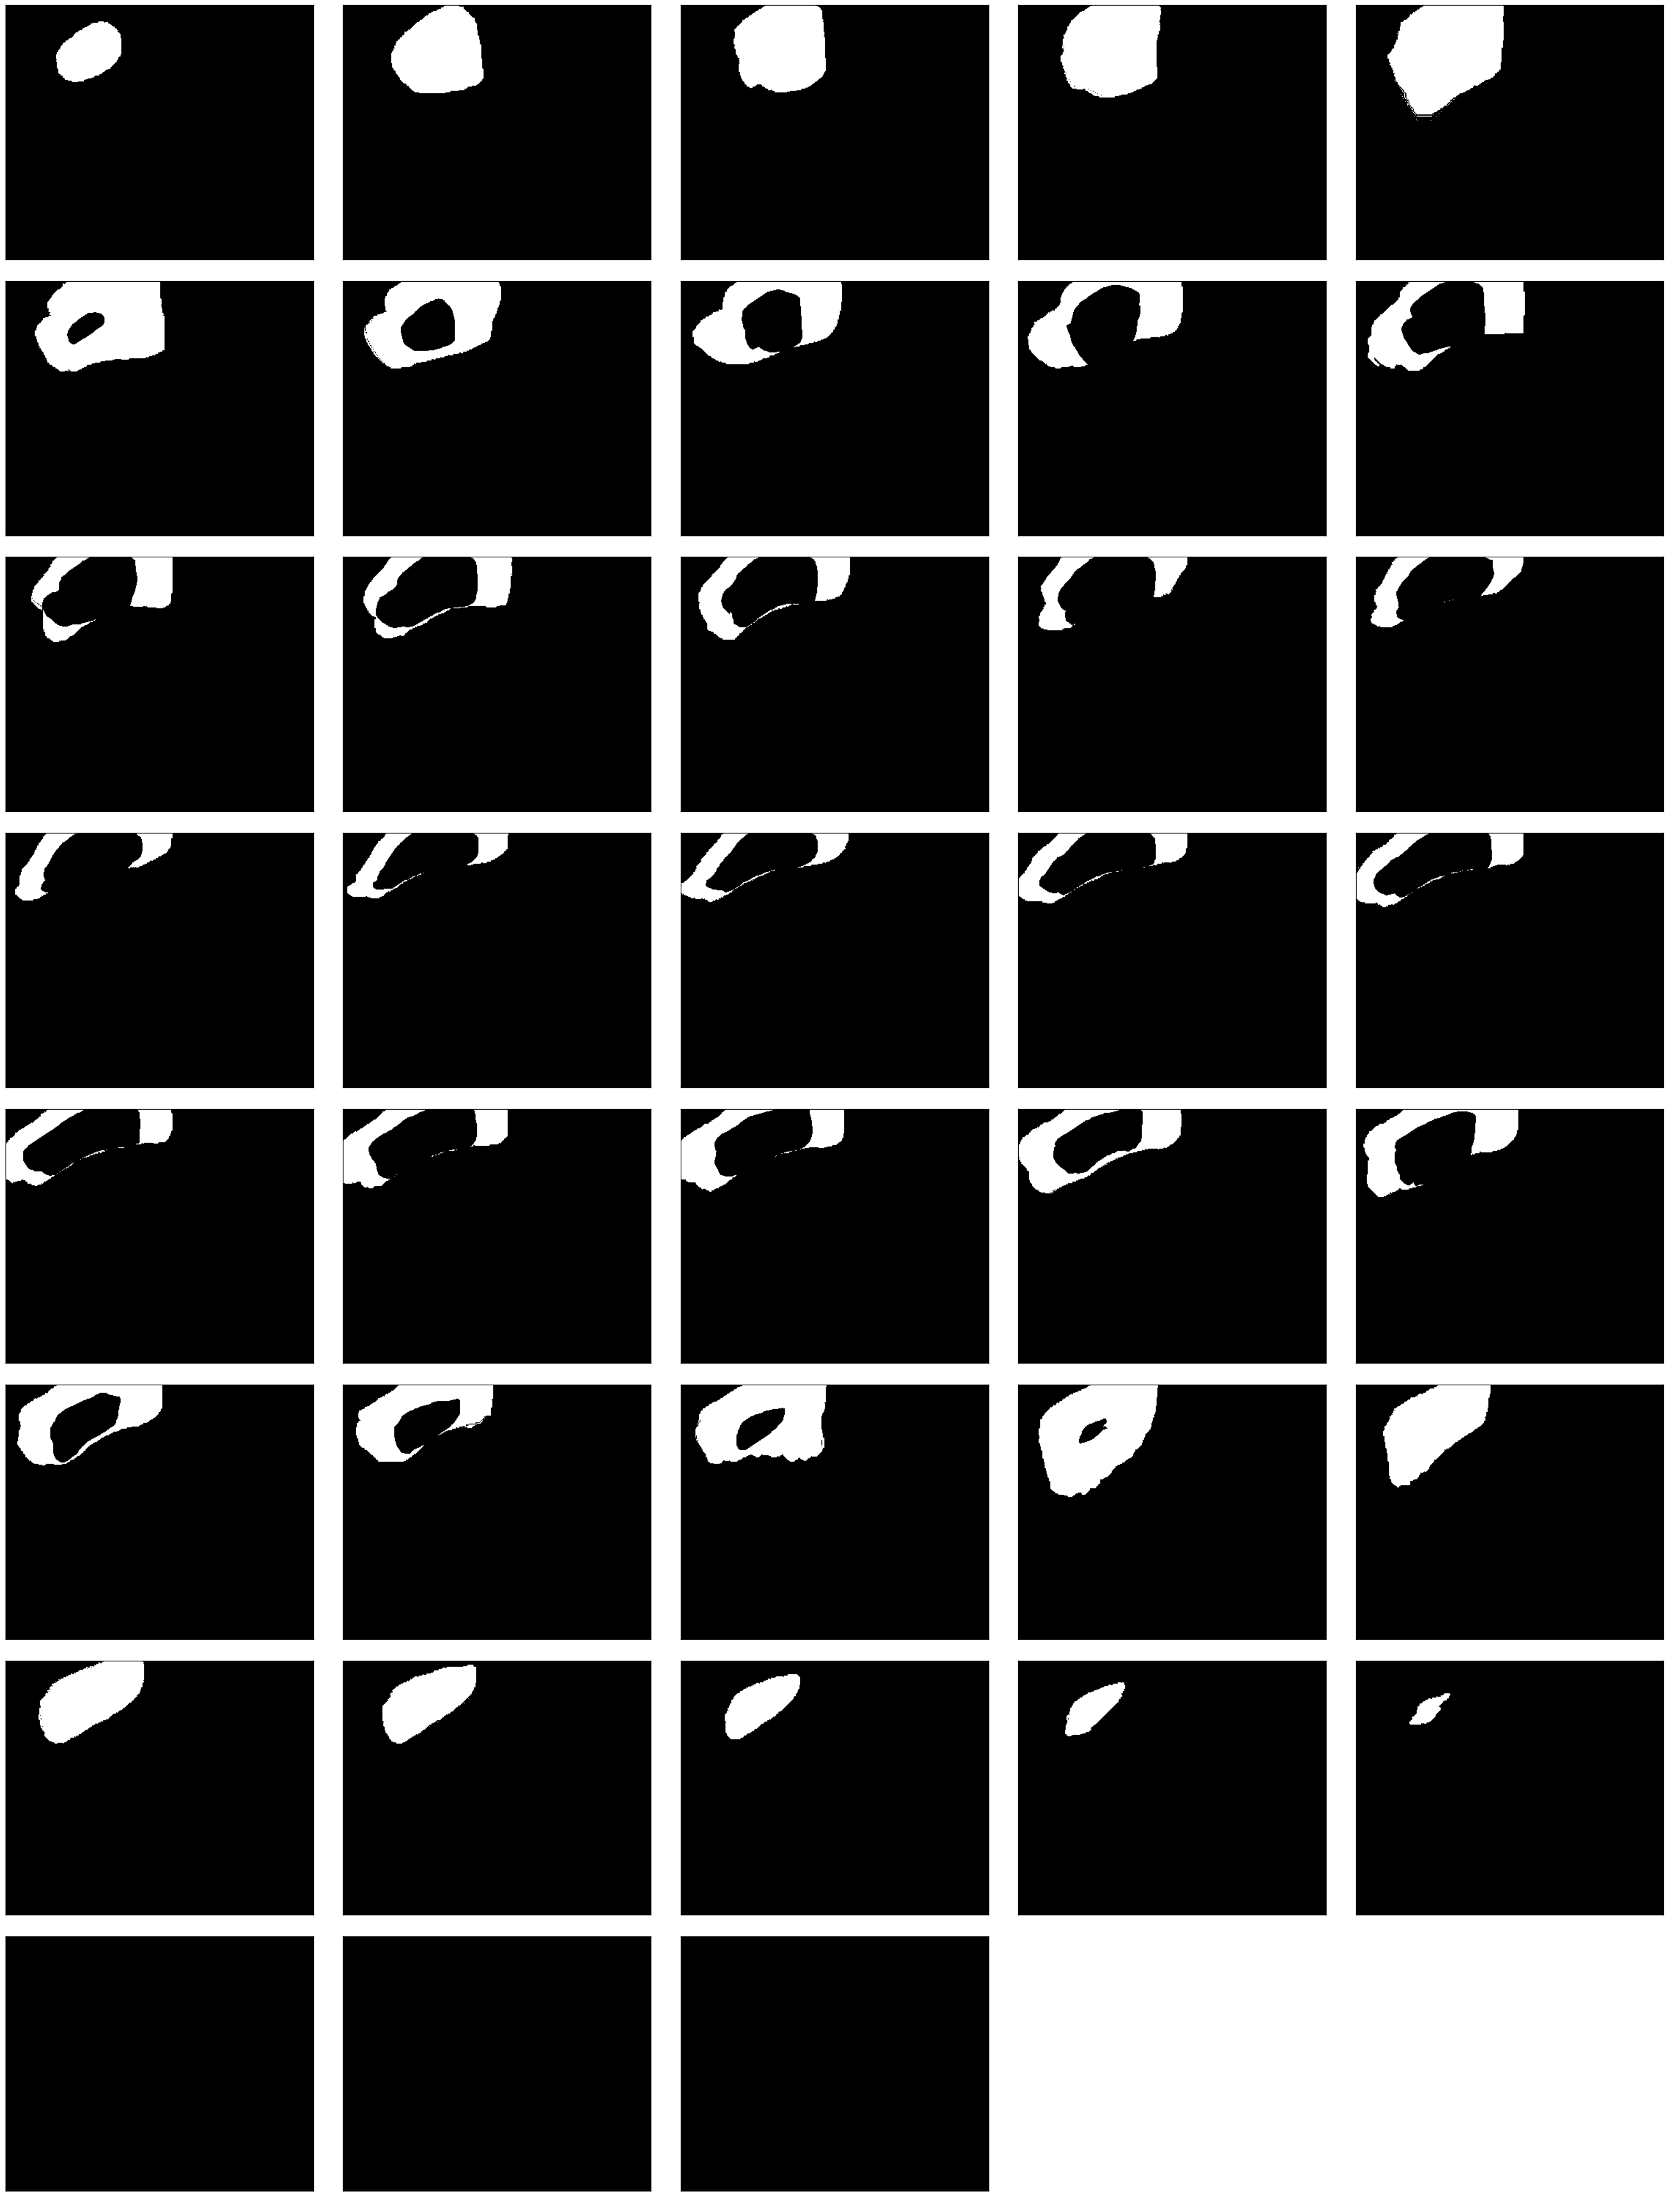

In [8]:
name_u = 'SC_surround'

output_dir = os.path.join(VOLUME_ROOTDIR, 'atlas_on_%(stack_f)s' % dict(stack_f=stack_fixed), 'score_volumes')
vol_fn = os.path.join(output_dir, 'atlas_on_%(stack_f)s_down32_scoreVolume_%(name)s.bp' % dict(stack_f=stack_fixed, name=name_u))

vol = bp.unpack_ndarray_file(vol_fn)

ims = [vol[:, :, z] for z in range(0, vol.shape[2], 10)]

display_images_in_grids(ims, 5, cmap=plt.cm.gray, vmin=0, vmax=1)

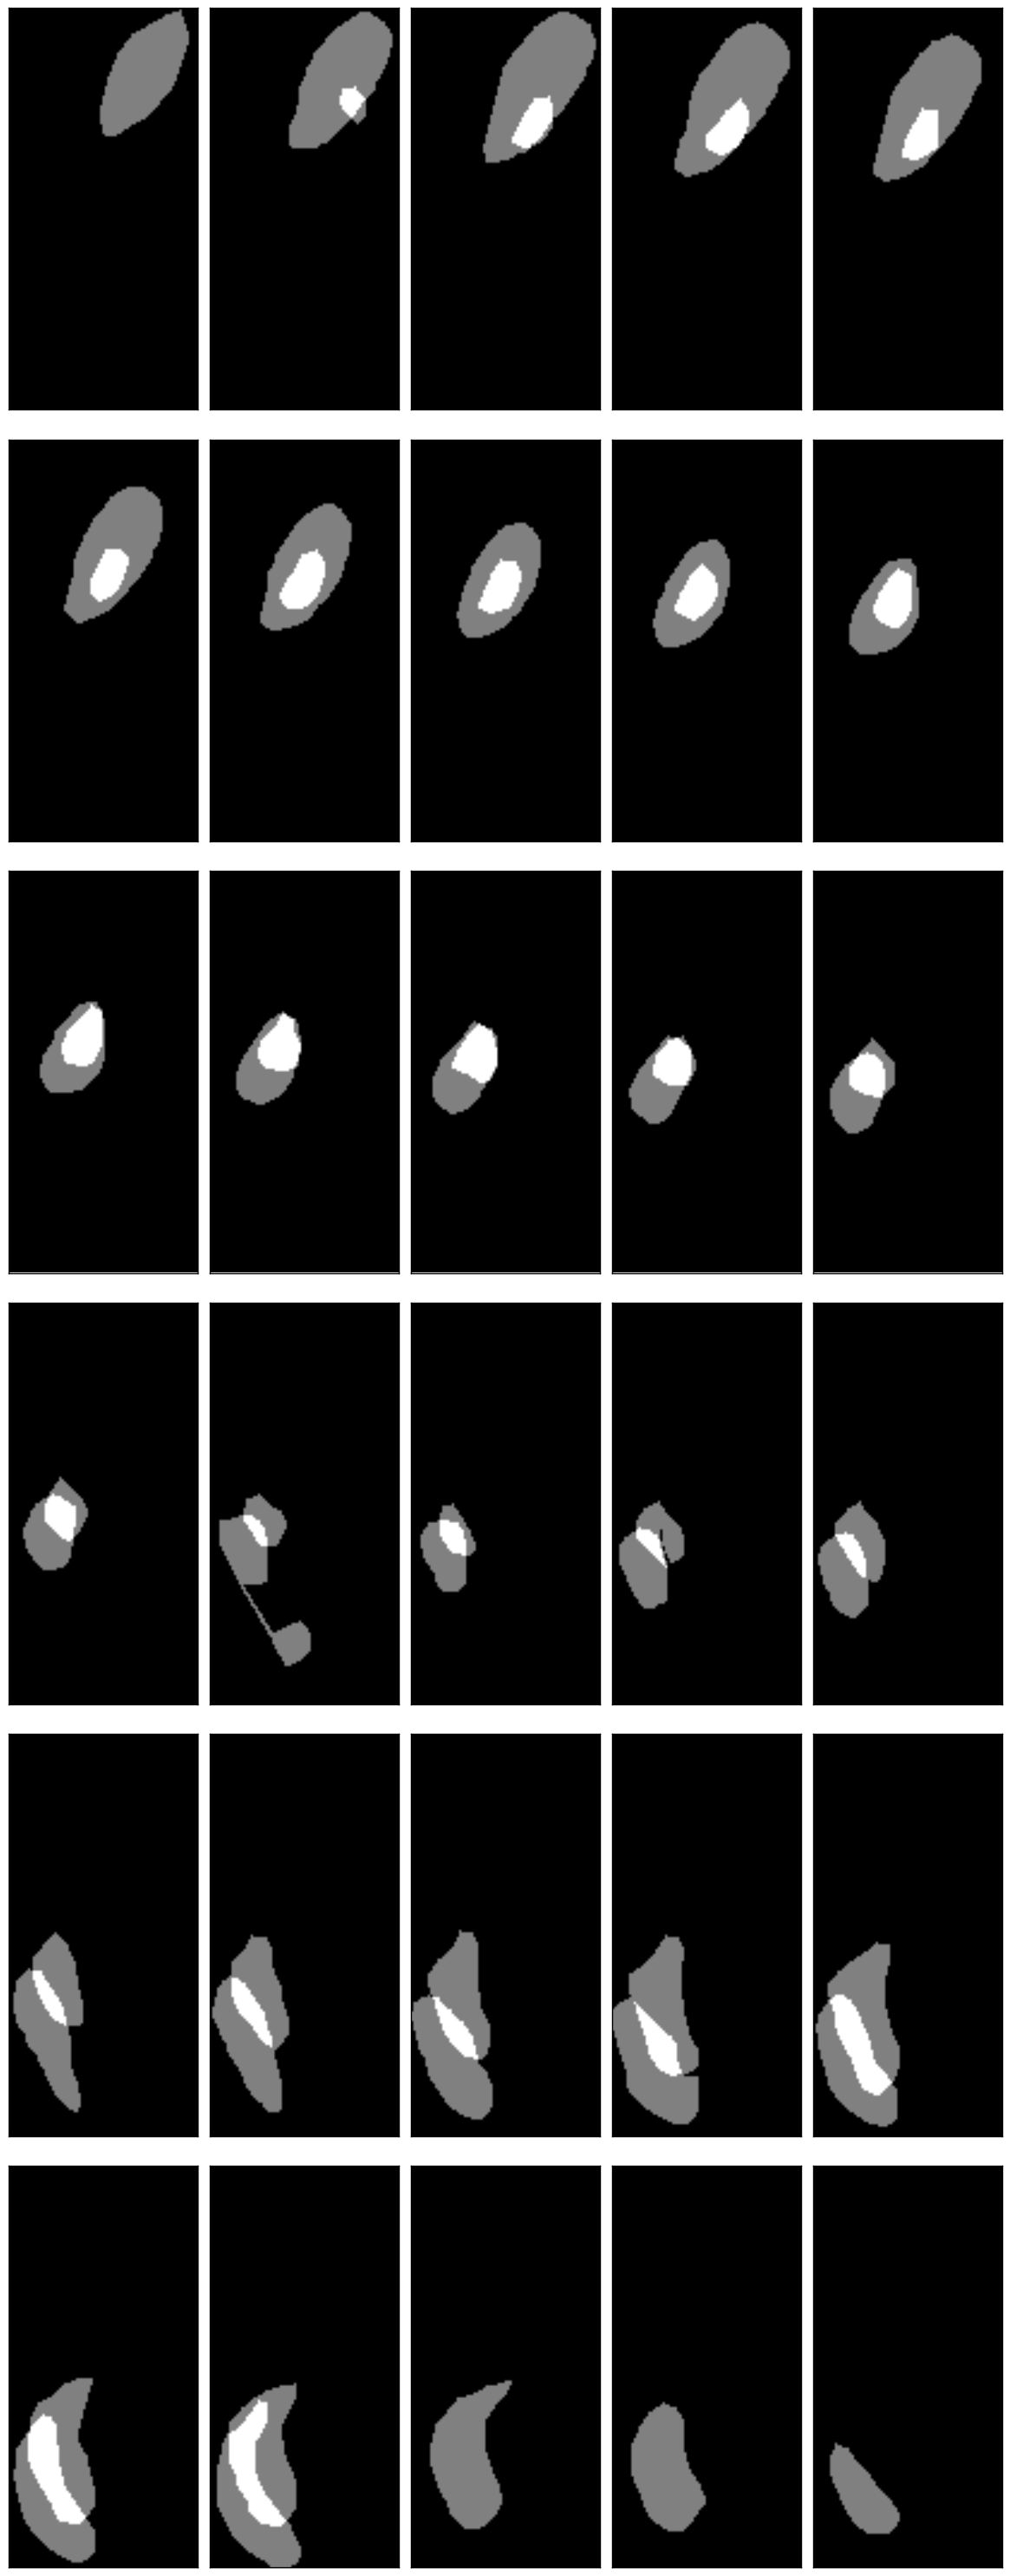

In [56]:
name_s = 'VLL_L'
ims = [aggregated_structure_volumes[name_s][:, :, z] 
       for z in range(0, aggregated_structure_volumes[name_s].shape[2], 2)]

display_images_in_grids(ims, 5, cmap=plt.cm.gray, vmin=0, vmax=1)

In [111]:
# Generate volumes for landmark surround regions

In [8]:
import scipy.ndimage as nd
from skimage.morphology import label

In [9]:
enlarge_factor = 1.5

In [26]:
structures_sided = sum([[n] if n in singular_structures 
                        else [convert_to_left_name(n), convert_to_right_name(n)] 
                        for n in structures], [])

In [48]:
stack_fixed = 'MD589'

output_dir = os.path.join(VOLUME_ROOTDIR, 'atlas_on_%(stack_f)s' % dict(stack_f=stack_fixed), 'score_volumes')

for name_s in structures_sided:
# for name_s in ['AP']:
    
    print name_s

    vol_fn = os.path.join(output_dir, 'atlas_on_%(stack_f)s_down32_scoreVolume_%(name)s.bp' % dict(stack_f=stack_fixed, name=name_s))
    vol = bp.unpack_ndarray_file(vol_fn)

    labeled_volume, num_components = label(vol > 0, return_num=True)
    
    overall_volume = np.zeros(vol.shape, np.float16)
    overall_ydim, overall_xdim, overall_zdim = overall_volume.shape

    for l in range(1, 1+num_components):

        ys, xs, zs = np.where(labeled_volume == l)

        centroid_y = ys.mean().astype(np.int)
        centroid_x = xs.mean().astype(np.int)
        centroid_z = zs.mean().astype(np.int)

        xmin, xmax, ymin, ymax, zmin, zmax = bbox_3d(labeled_volume == l)

        cropped_vol = labeled_volume[ymin:ymax+1, xmin:xmax+1, zmin:zmax+1] == l
        cropped_vol_ydim, cropped_vol_xdim, cropped_vol_zdim = cropped_vol.shape

        enlarged_vol = nd.interpolation.zoom(cropped_vol.astype(np.float), zoom=enlarge_factor) > .1
        enlarged_ydim, enlarged_xdim, enlarged_zdim = enlarged_vol.shape

        center_y, center_x, center_z = np.array(enlarged_vol.shape)/2

        enlarged_vol[center_y-cropped_vol_ydim/2:center_y+cropped_vol_ydim-cropped_vol_ydim/2,
                     center_x-cropped_vol_xdim/2:center_x+cropped_vol_xdim-cropped_vol_xdim/2,
                     center_z-cropped_vol_zdim/2:center_z+cropped_vol_zdim-cropped_vol_zdim/2][cropped_vol] = 0
        
        proposed_sub_xmin = centroid_x - enlarged_xdim/2
        proposed_sub_xmax = proposed_sub_xmin + enlarged_xdim - 1
        
        proposed_sub_zmin = centroid_z - enlarged_zdim/2
        proposed_sub_zmax = proposed_sub_zmin + enlarged_zdim - 1
        
        proposed_sub_ymin = centroid_y - enlarged_ydim/2
        proposed_sub_ymax = proposed_sub_ymin + enlarged_ydim - 1
        
        if proposed_sub_ymin < 0:
            sub_vol_ymin = - proposed_sub_ymin
            sub_vol_ymax = enlarged_ydim - 1
            proposed_sub_ymin = 0
        elif proposed_sub_ymax >= overall_ydim:
            sub_vol_ymin = 0
            sub_vol_ymax = enlarged_ydim - 1 - (proposed_sub_ymax - overall_ydim + 1)
            proposed_sub_ymax = overall_ydim - 1
        else:
            sub_vol_ymin = 0
            sub_vol_ymax = enlarged_ydim - 1

        if proposed_sub_xmin < 0:
            sub_vol_xmin = - proposed_sub_xmin
            sub_vol_xmax = enlarged_xdim - 1
            proposed_sub_xmin = 0
        elif proposed_sub_xmax >= overall_xdim:
            sub_vol_xmin = 0
            sub_vol_xmax = enlarged_xdim - 1 - (proposed_sub_xmax - overall_xdim + 1)
            proposed_sub_xmax = overall_xdim - 1
        else:
            sub_vol_xmin = 0
            sub_vol_xmax = enlarged_xdim - 1

        if proposed_sub_zmin < 0:
            sub_vol_zmin = - proposed_sub_zmin
            sub_vol_zmax = enlarged_zdim - 1
            proposed_sub_zmin = 0
        elif proposed_sub_zmax >= overall_zdim:
            sub_vol_zmin = 0
            sub_vol_zmax = enlarged_zdim - 1 - (proposed_sub_zmax - overall_zdim + 1)
            proposed_sub_zmax = overall_zdim - 1
        else:
            sub_vol_zmin = 0
            sub_vol_zmax = enlarged_zdim - 1

        overall_volume[proposed_sub_ymin:proposed_sub_ymax+1,
                       proposed_sub_xmin:proposed_sub_xmax+1,
                       proposed_sub_zmin:proposed_sub_zmax+1] = \
        enlarged_vol[sub_vol_ymin:sub_vol_ymax+1,
                    sub_vol_xmin:sub_vol_xmax+1,
                    sub_vol_zmin:sub_vol_zmax+1].copy().astype(np.float16)

    vol_fn = DataManager.get_score_volume_filepath(stack='atlas_on_MD589', label=name_s + '_surround', downscale=32)
    bp.pack_ndarray_file(overall_volume, vol_fn)

5N_L
5N_R
6N_L
6N_R
7N_L
7N_R
7n_L
7n_R
Amb_L
Amb_R
LC_L
LC_R
LRt_L
LRt_R
Pn_L
Pn_R
Tz_L
Tz_R
VLL_L
VLL_R
RMC_L
RMC_R
SNC_L
SNC_R
SNR_L
SNR_R
3N_L
3N_R
4N_L
4N_R
Sp5I_L
Sp5I_R
Sp5O_L
Sp5O_R
Sp5C_L
Sp5C_R
PBG_L
PBG_R
10N_L
10N_R
VCA_L
VCA_R
VCP_L
VCP_R
DC_L
DC_R
AP
12N
RtTg
SC
IC


In [49]:
# stack_fixed = 'MD589'

# output_dir = os.path.join(VOLUME_ROOTDIR, 'atlas_on_%(stack_f)s' % dict(stack_f=stack_fixed), 'score_volumes')

# for name_u in structures:
# # for name_u in ['LRt']:
    
#     print name_u

#     vol_fn = os.path.join(output_dir, 'atlas_on_%(stack_f)s_down32_scoreVolume_%(name)s.bp' % dict(stack_f=stack_fixed, name=name_u))
#     vol = bp.unpack_ndarray_file(vol_fn)

#     labeled_volume, num_components = label(vol > 0, return_num=True)
    
#     overall_volume = np.zeros(vol.shape, np.float16)
#     overall_ydim, overall_xdim, overall_zdim = overall_volume.shape

#     for l in range(1, 1+num_components):

#         ys, xs, zs = np.where(labeled_volume == l)

#         centroid_y = ys.mean().astype(np.int)
#         centroid_x = xs.mean().astype(np.int)
#         centroid_z = zs.mean().astype(np.int)

#         xmin, xmax, ymin, ymax, zmin, zmax = bbox_3d(labeled_volume == l)

#         cropped_vol = labeled_volume[ymin:ymax+1, xmin:xmax+1, zmin:zmax+1] == l
#         cropped_vol_ydim, cropped_vol_xdim, cropped_vol_zdim = cropped_vol.shape

#         enlarged_vol = nd.interpolation.zoom(cropped_vol.astype(np.float), zoom=enlarge_factor) > .1
#         enlarged_ydim, enlarged_xdim, enlarged_zdim = enlarged_vol.shape

#         center_y, center_x, center_z = np.array(enlarged_vol.shape)/2

#         enlarged_vol[center_y-cropped_vol_ydim/2:center_y+cropped_vol_ydim-cropped_vol_ydim/2,
#                      center_x-cropped_vol_xdim/2:center_x+cropped_vol_xdim-cropped_vol_xdim/2,
#                      center_z-cropped_vol_zdim/2:center_z+cropped_vol_zdim-cropped_vol_zdim/2][cropped_vol] = 0
        
#         proposed_sub_xmin = centroid_x - enlarged_xdim/2
#         proposed_sub_xmax = proposed_sub_xmin + enlarged_xdim - 1
        
#         proposed_sub_zmin = centroid_z - enlarged_zdim/2
#         proposed_sub_zmax = proposed_sub_zmin + enlarged_zdim - 1
        
#         proposed_sub_ymin = centroid_y - enlarged_ydim/2
#         proposed_sub_ymax = proposed_sub_ymin + enlarged_ydim - 1
        
#         if proposed_sub_ymin < 0:
#             sub_vol_ymin = - proposed_sub_ymin
#             sub_vol_ymax = enlarged_ydim - 1
#             proposed_sub_ymin = 0
#         elif proposed_sub_ymax >= overall_ydim:
#             sub_vol_ymin = 0
#             sub_vol_ymax = enlarged_ydim - 1 - (proposed_sub_ymax - overall_ydim + 1)
#             proposed_sub_ymax = overall_ydim - 1
#         else:
#             sub_vol_ymin = 0
#             sub_vol_ymax = enlarged_ydim - 1

#         if proposed_sub_xmin < 0:
#             sub_vol_xmin = - proposed_sub_xmin
#             sub_vol_xmax = enlarged_xdim - 1
#             proposed_sub_xmin = 0
#         elif proposed_sub_xmax >= overall_xdim:
#             sub_vol_xmin = 0
#             sub_vol_xmax = enlarged_xdim - 1 - (proposed_sub_xmax - overall_xdim + 1)
#             proposed_sub_xmax = overall_xdim - 1
#         else:
#             sub_vol_xmin = 0
#             sub_vol_xmax = enlarged_xdim - 1

#         if proposed_sub_zmin < 0:
#             sub_vol_zmin = - proposed_sub_zmin
#             sub_vol_zmax = enlarged_zdim - 1
#             proposed_sub_zmin = 0
#         elif proposed_sub_zmax >= overall_zdim:
#             sub_vol_zmin = 0
#             sub_vol_zmax = enlarged_zdim - 1 - (proposed_sub_zmax - overall_zdim + 1)
#             proposed_sub_zmax = overall_zdim - 1
#         else:
#             sub_vol_zmin = 0
#             sub_vol_zmax = enlarged_zdim - 1

#         overall_volume[proposed_sub_ymin:proposed_sub_ymax+1,
#                        proposed_sub_xmin:proposed_sub_xmax+1,
#                        proposed_sub_zmin:proposed_sub_zmax+1] = \
#         enlarged_vol[sub_vol_ymin:sub_vol_ymax+1,
#                     sub_vol_xmin:sub_vol_xmax+1,
#                     sub_vol_zmin:sub_vol_zmax+1].copy().astype(np.float16)

# #     vol_fn = os.path.join(output_dir, 'atlas_on_%(stack_f)s_down32_scoreVolume_%(name)s_surround.bp' % dict(stack_f=stack_fixed, name=name_u))
# #     bp.pack_ndarray_file(overall_volume, vol_fn)

In [52]:
vol = DataManager.load_score_volume(stack='atlas_on_MD589', label='VLL_R_surround', downscale=32)

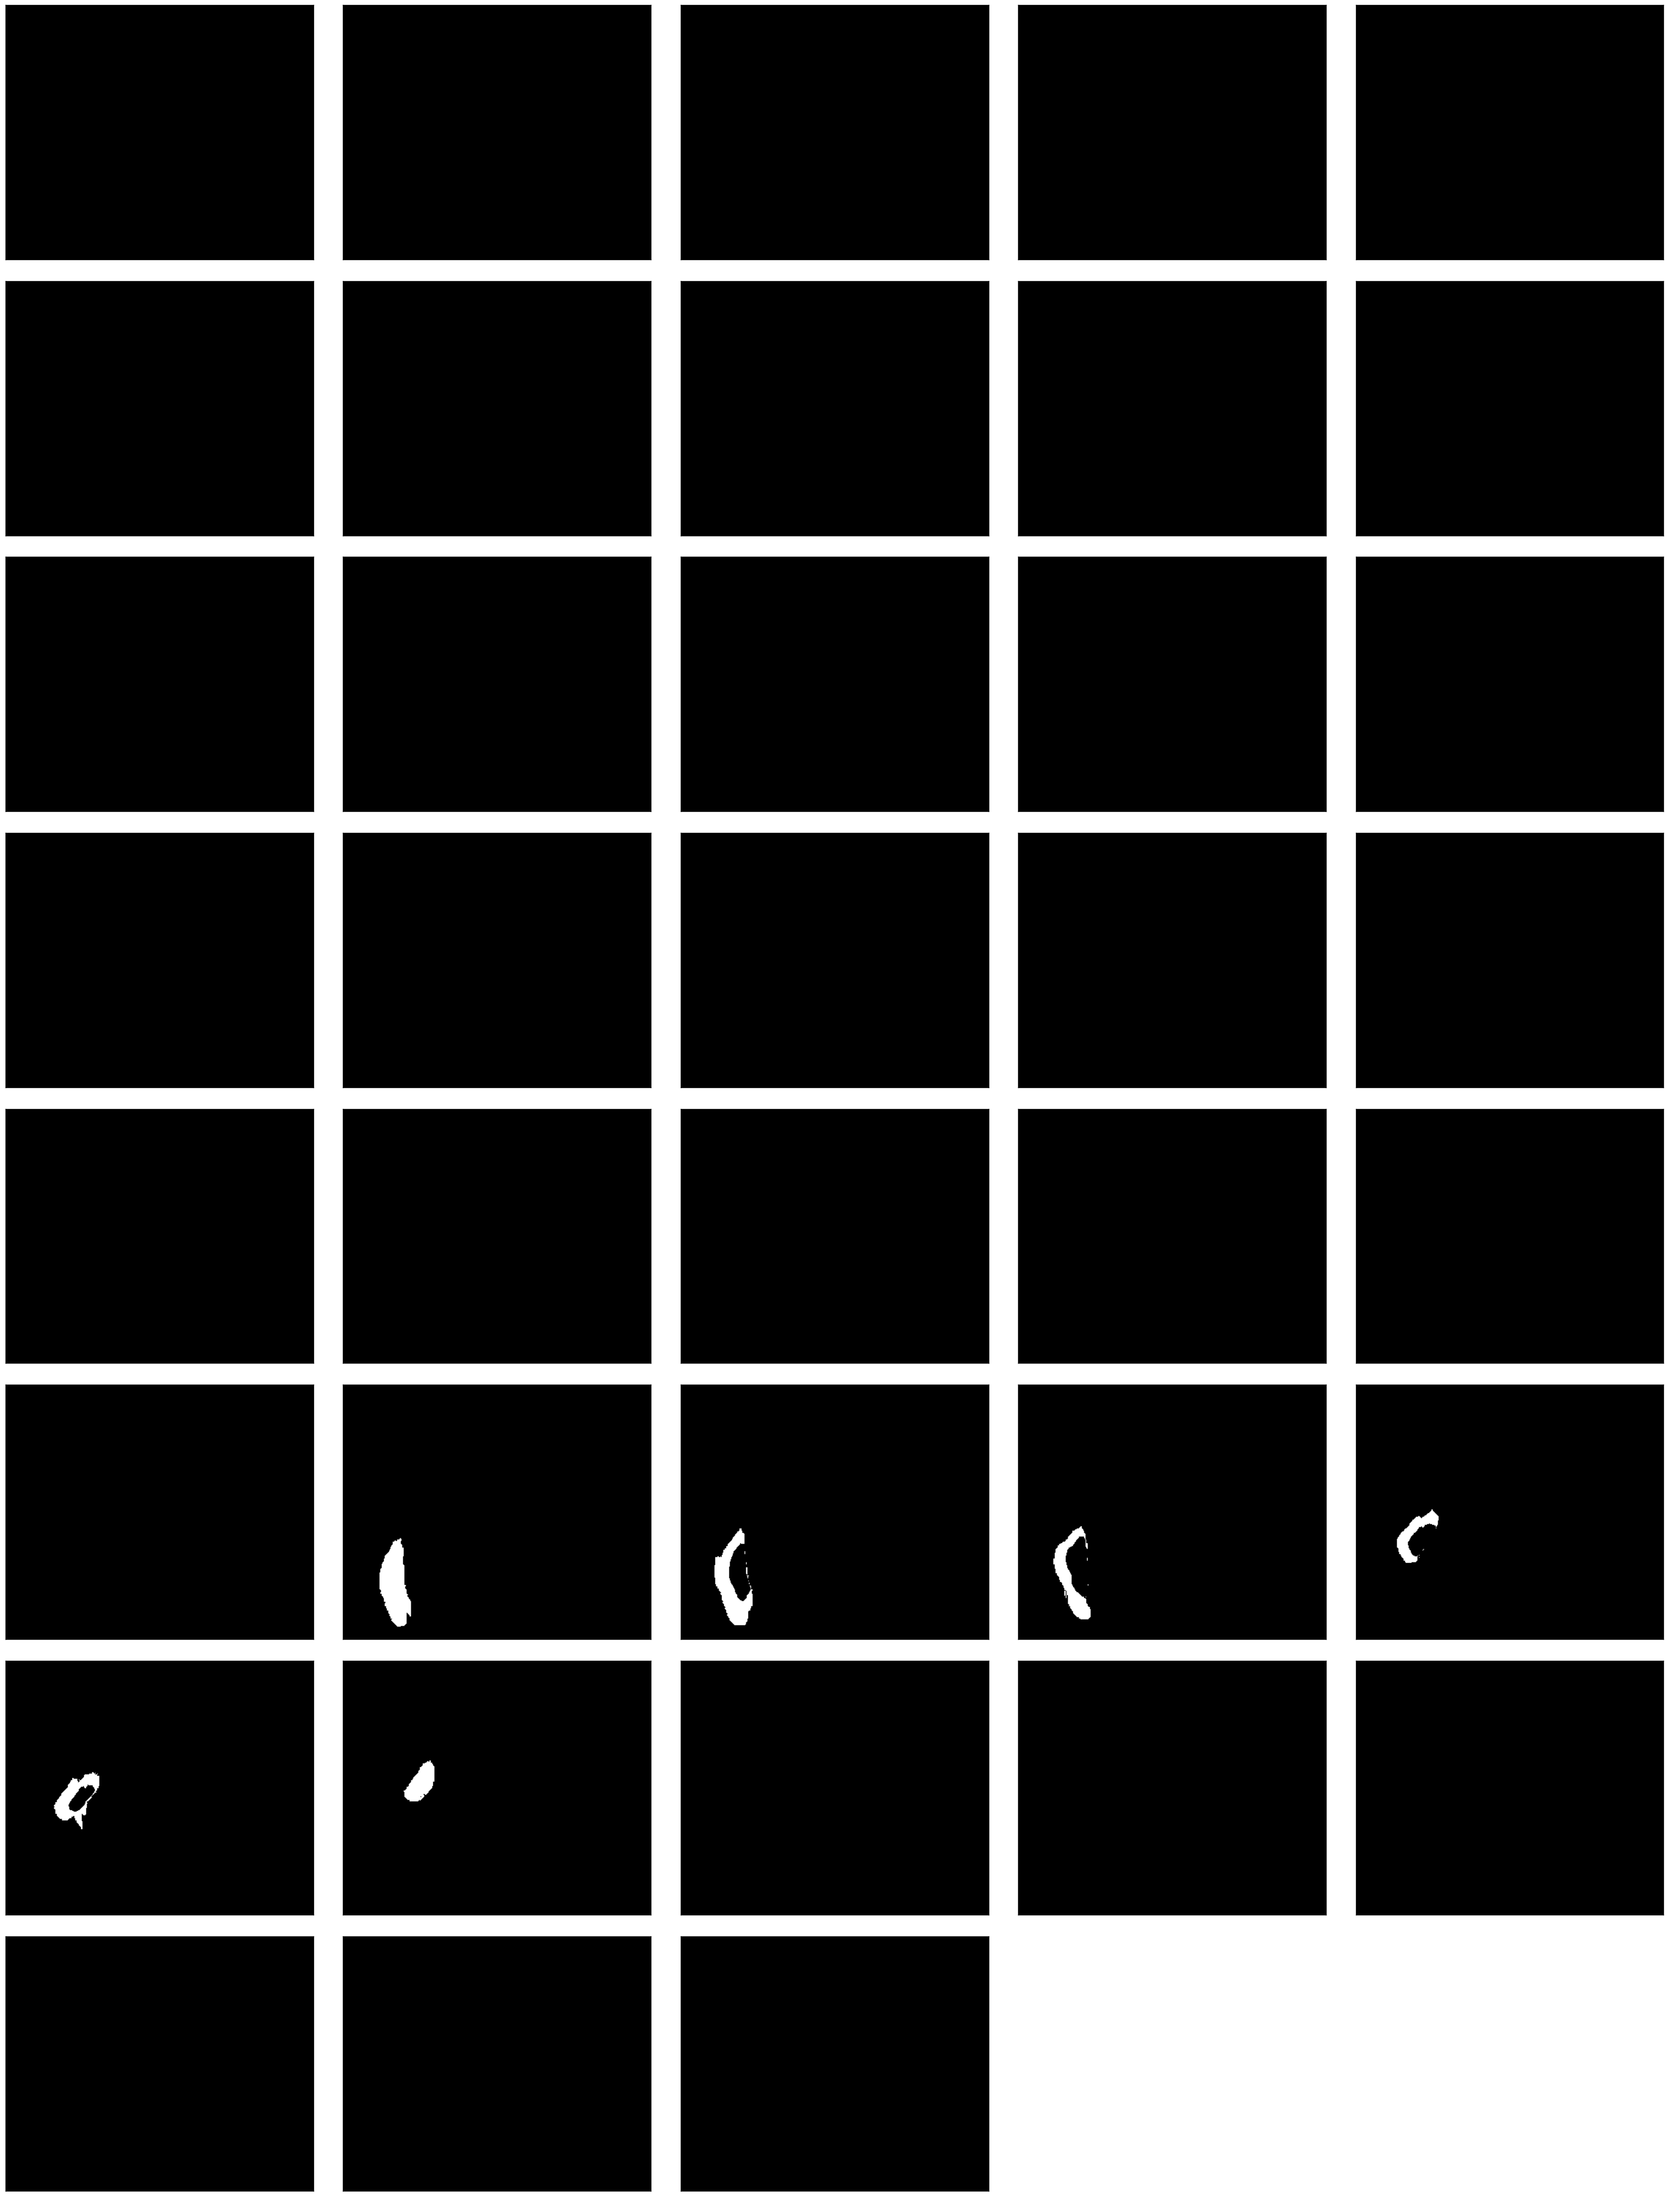

In [53]:
ims = [vol[:, :, z] for z in range(0, vol.shape[2], 10)]
display_images_in_grids(ims, 5, cmap=plt.cm.gray, vmin=0, vmax=1)

In [ ]:
ims = [overall_volume[:, :, z] for z in range(0, overall_volume.shape[2], 2)]
display_images_in_grids(ims, 5, cmap=plt.cm.gray, vmin=0, vmax=1)